In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/GridNet/Datasets/powerconsumption.csv', parse_dates=['Datetime'], index_col=['Datetime'])
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [4]:
df['powerconsumption'] = df[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [5]:
df.sort_values(by='Datetime', ascending=True)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [1]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(df.to_numpy())
# df = pd.DataFrame(df, columns=[
#   'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'powerconsumption'])
# df

In [6]:
Temp_max = df["Temperature"].max()
Hum_max = df["Humidity"].max()
WindSpeed_max = df["WindSpeed"].max()
demand_max = df["powerconsumption"].max()
df[['Temperature']] = df[['Temperature']]/Temp_max
df[['Humidity']] = df[['Humidity']]/Hum_max
df[['WindSpeed']] = df[['WindSpeed']]/WindSpeed_max
df[['powerconsumption']] = df[['powerconsumption']]/demand_max
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,0.163934,0.778481,0.012803,0.051,0.119,34055.69620,16128.87538,20240.96386,0.524749
2017-01-01 00:10:00,0.160310,0.785865,0.012803,0.070,0.085,29814.68354,19375.07599,20131.08434,0.516517
2017-01-01 00:20:00,0.157786,0.785865,0.012340,0.062,0.100,29128.10127,19006.68693,19668.43373,0.505209
2017-01-01 00:30:00,0.152987,0.791139,0.012803,0.091,0.096,28228.86076,18361.09422,18899.27711,0.487968
2017-01-01 00:40:00,0.147988,0.798523,0.012494,0.048,0.085,27335.69620,17872.34043,18442.40964,0.474267
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,0.175206,0.763713,0.012340,0.040,0.096,31160.45627,26857.31820,14780.31212,0.542427
2017-12-30 23:20:00,0.173632,0.765823,0.012648,0.051,0.093,30430.41825,26124.57809,14428.81152,0.528908
2017-12-30 23:30:00,0.172457,0.767932,0.013265,0.084,0.074,29590.87452,25277.69254,13806.48259,0.511706


In [107]:
WindSpeed_max

6.483

In [50]:
df = df[['Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
df

,Temperature,Humidity,WindSpeed,powerconsumption
Datetime,,,,
2017-01-01 00:00:00,0.163934,0.778481,0.012803,0.524749
2017-01-01 00:10:00,0.160310,0.785865,0.012803,0.516517
2017-01-01 00:20:00,0.157786,0.785865,0.012340,0.505209
2017-01-01 00:30:00,0.152987,0.791139,0.012803,0.487968
2017-01-01 00:40:00,0.147988,0.798523,0.012494,0.474267
...,...,...,...,...
2017-12-30 23:10:00,0.175206,0.763713,0.012340,0.542427
2017-12-30 23:20:00,0.173632,0.765823,0.012648,0.528908
2017-12-30 23:30:00,0.172457,0.767932,0.013265,0.511706


In [51]:
def create_time_windows(data, window_size, step_size):
    windows = []
    targets = []

    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        target = data['powerconsumption'].iloc[i + window_size]  # Assuming 'Radiation' is the target variable

        windows.append(window.values)
        targets.append(target)
        

    return windows, targets

X, y = create_time_windows(df, 7, 1)
X, y

([array([[0.16393402, 0.77848101, 0.01280271, 0.52474859],
         [0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113]]),
  array([[0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
         [0.13736566, 0.82489451, 0.01311121, 0.44383857]]),
  array([[0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.4742

In [52]:
type(y)

list

In [53]:
X = np.array(X)
y = np.array(y)
X, y

(array([[[0.16393402, 0.77848101, 0.01280271, 0.52474859],
         [0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         ...,
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113]],
 
        [[0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         ...,
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
         [0.13736566, 0.82489451, 0.01311121, 0.44383857]],
 
        [[0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         ...,
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
        

In [54]:
len(X)

52409

In [55]:
X.shape, y.shape


((52409, 7, 4), (52409,))

In [56]:
X_train = X[:42000]
y_train = y[:42000]
X_test = X[42000:]
y_test = y[42000:]

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, activation='tanh', input_shape =(X.shape[1], X.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(150, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [58]:
model.compile(optimizer='adam', loss = 'mse')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 200)            164000    
                                                                 
 lstm_3 (LSTM)               (None, 150)               210600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 374751 (1.43 MB)
Trainable params: 374751 (1.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
path = '/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath =  path, monitor = 'val_loss', save_best_only=True, verbose=1, mode = min)

In [63]:
results = model.fit(X_train, y_train, epochs = 100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[checkpoint])

Epoch 1/100


1049/1050 [============================>.] - ETA: 0s - loss: 0.0016
Epoch 1: val_loss improved from inf to 0.00022, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5
1050/1050 [==============================] - 15s 15ms/step - loss: 0.0016 - val_loss: 2.1912e-04
Epoch 2/100
  10/1050 [..............................] - ETA: 12s - loss: 7.3385e-04

/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1047/1050 [============================>.] - ETA: 0s - loss: 7.6701e-04
Epoch 2: val_loss improved from 0.00022 to 0.00009, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5
1050/1050 [==============================] - 11s 10ms/step - loss: 7.6644e-04 - val_loss: 9.4856e-05
Epoch 3/100
1046/1050 [============================>.] - ETA: 0s - loss: 5.3603e-04
Epoch 3: val_loss improved from 0.00009 to 0.00008, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5
1050/1050 [==============================] - 11s 11ms/step - loss: 5.3577e-04 - val_loss: 8.1453e-05
Epoch 4/100
1049/1050 [============================>.] - ETA: 0s - loss: 3.9100e-04
Epoch 4: val_loss did not improve from 0.00008
1050/1050 [==============================] - 11s 10ms/step - loss: 3.9080e-04 - val_loss: 8.3129e-05
Epoch 5/100
1046/1050 [============================>.] - ETA: 0s

In [64]:
gen_model = tf.keras.models.load_model('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5')
preds = gen_model.predict(X_test)

326/326 [==============================] - 1s 3ms/step


In [65]:
gen_model.evaluate(X_test, y_test)

326/326 [==============================] - 1s 3ms/step - loss: 2.2047e-05


2.2047031961847097e-05

In [66]:
# X_train = X[:42000]
# y_train = y[:42000]
# X_test = X[42000:]
# y_test = y[42000:]

result_df = pd.read_csv('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/datasets/powerconsumption.csv', parse_dates=['Datetime'])
result_df_X_test = result_df[42000:]
result_df_X_test['powerconsumption'] = result_df_X_test[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)
result_df_X_test = result_df_X_test[['Datetime','Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
result_df_X_test[['Temperature']] = result_df_X_test[['Temperature']]/Temp_max
result_df_X_test[['Humidity']] = result_df_X_test[['Humidity']]/Hum_max
result_df_X_test[['WindSpeed']] = result_df_X_test[['WindSpeed']]/WindSpeed_max
result_df_X_test[['powerconsumption']] = result_df_X_test[['powerconsumption']]/demand_max
result_df_X_test

/var/folders/76/pgpg1wqx1vjdlv7_ccm6_rs00000gn/T/ipykernel_54243/2230738786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_X_test['powerconsumption'] = result_df_X_test[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)


,Datetime,Temperature,Humidity,WindSpeed,powerconsumption
42000,2017-10-19 16:00:00,0.532617,0.764768,0.759062,0.528961
42001,2017-10-19 16:10:00,0.535116,0.773207,0.759062,0.524585
42002,2017-10-19 16:20:00,0.536366,0.784810,0.758291,0.523185
42003,2017-10-19 16:30:00,0.539615,0.800633,0.758599,0.523337
42004,2017-10-19 16:40:00,0.538115,0.810127,0.758291,0.523793
...,...,...,...,...,...
52411,2017-12-30 23:10:00,0.175206,0.763713,0.012340,0.542427
52412,2017-12-30 23:20:00,0.173632,0.765823,0.012648,0.528908
52413,2017-12-30 23:30:00,0.172457,0.767932,0.013265,0.511706
52414,2017-12-30 23:40:00,0.168908,0.770042,0.012340,0.500439


In [67]:
result_df_X_test.to_csv('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/TestSets/load_X_test.csv', index=False)

In [68]:
df_load_X = result_df_X_test[0:7]
df_load_X

,Datetime,Temperature,Humidity,WindSpeed,powerconsumption
42000,2017-10-19 16:00:00,0.532617,0.764768,0.759062,0.528961
42001,2017-10-19 16:10:00,0.535116,0.773207,0.759062,0.524585
42002,2017-10-19 16:20:00,0.536366,0.784810,0.758291,0.523185
42003,2017-10-19 16:30:00,0.539615,0.800633,0.758599,0.523337
42004,2017-10-19 16:40:00,0.538115,0.810127,0.758291,0.523793
42005,2017-10-19 16:50:00,0.534116,0.815401,0.758599,0.520340
42006,2017-10-19 17:00:00,0.535116,0.820675,0.759371,0.518873


In [69]:
# X_sample = np.array(df_load_X)
# X_sample

In [94]:
load_model = tf.keras.models.load_model('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model_load1_100.h5')
X_sample =df_load_X[['Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
X_sample = np.array(X_sample)
X_sample
load_model.predict(X_test[0:1])
X_test[0:1]

1/1 [==============================] - 0s 307ms/step


array([[[0.53261685, 0.76476793, 0.75906216, 0.52896124],
        [0.53511622, 0.77320675, 0.75906216, 0.52458546],
        [0.53636591, 0.78481013, 0.75829091, 0.52318543],
        [0.5396151 , 0.80063291, 0.75859941, 0.52333689],
        [0.53811547, 0.81012658, 0.75829091, 0.52379261],
        [0.53411647, 0.81540084, 0.75859941, 0.52034035],
        [0.53511622, 0.82067511, 0.75937066, 0.51887257]]])

In [93]:
np.reshape(X_sample, (1, 7, 4))

array([[[0.53261685, 0.76476793, 0.75906216, 0.52896124],
        [0.53511622, 0.77320675, 0.75906216, 0.52458546],
        [0.53636591, 0.78481013, 0.75829091, 0.52318543],
        [0.5396151 , 0.80063291, 0.75859941, 0.52333689],
        [0.53811547, 0.81012658, 0.75829091, 0.52379261],
        [0.53411647, 0.81540084, 0.75859941, 0.52034035],
        [0.53511622, 0.82067511, 0.75937066, 0.51887257]]])

In [95]:
load_model.predict(np.reshape(X_sample, (1, 7, 4)))


1/1 [==============================] - 0s 35ms/step


array([[0.51783925]], dtype=float32)

In [96]:
load_X_test = pd.read_csv('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/TestSets/load_X_test.csv', parse_dates=['Datetime'])


In [103]:
df_load_X = load_X_test[0:7]
X_load = df_load_X[['Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
X_load
X_load = np.array(X_load)
X_load
# load_pred = load_model.predict(X_load)

array([[0.53261685, 0.76476793, 0.75906216, 0.52896124],
       [0.53511622, 0.77320675, 0.75906216, 0.52458546],
       [0.53636591, 0.78481013, 0.75829091, 0.52318543],
       [0.5396151 , 0.80063291, 0.75859941, 0.52333689],
       [0.53811547, 0.81012658, 0.75829091, 0.52379261],
       [0.53411647, 0.81540084, 0.75859941, 0.52034035],
       [0.53511622, 0.82067511, 0.75937066, 0.51887257]])

In [109]:
X_test

array([[[0.53261685, 0.76476793, 0.75906216, 0.52896124],
        [0.53511622, 0.77320675, 0.75906216, 0.52458546],
        [0.53636591, 0.78481013, 0.75829091, 0.52318543],
        ...,
        [0.53811547, 0.81012658, 0.75829091, 0.52379261],
        [0.53411647, 0.81540084, 0.75859941, 0.52034035],
        [0.53511622, 0.82067511, 0.75937066, 0.51887257]],

       [[0.53511622, 0.77320675, 0.75906216, 0.52458546],
        [0.53636591, 0.78481013, 0.75829091, 0.52318543],
        [0.5396151 , 0.80063291, 0.75859941, 0.52333689],
        ...,
        [0.53411647, 0.81540084, 0.75859941, 0.52034035],
        [0.53511622, 0.82067511, 0.75937066, 0.51887257],
        [0.53386653, 0.82805907, 0.75875366, 0.52472868]],

       [[0.53636591, 0.78481013, 0.75829091, 0.52318543],
        [0.5396151 , 0.80063291, 0.75859941, 0.52333689],
        [0.53811547, 0.81012658, 0.75829091, 0.52379261],
        ...,
        [0.53511622, 0.82067511, 0.75937066, 0.51887257],
        [0.53386653, 0.828059

In [110]:
preds

array([[0.51783925],
       [0.5286766 ],
       [0.5577146 ],
       ...,
       [0.5189998 ],
       [0.49862024],
       [0.4896109 ]], dtype=float32)

In [135]:
# y_test = y[42000:]
time_axis = load_X_test[['Datetime']]

In [136]:
time_axis = time_axis[['Datetime']][:10409]
time_axis = np.array(time_axis)

In [137]:
import matplotlib.pyplot as plt

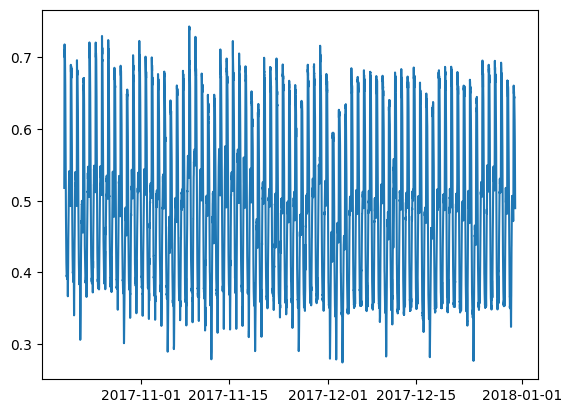

In [139]:
plt.plot(time_axis, preds)

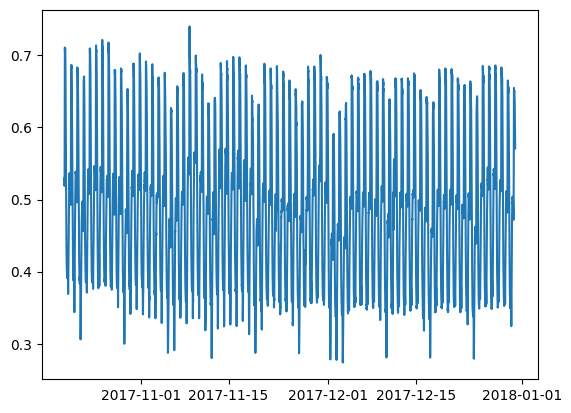

In [142]:
plt.plot(time_axis, load_X_test[['powerconsumption']][:10409])